In [107]:
import sklearn as skl
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing  
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
import sklearn
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

RANDOM_SEED = 2021

# Data Visualization

In [108]:
# Read csv file
df = pd.read_csv('../datasets/properties_data.csv')


In [56]:
# See first 5 lines
df.head()

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False


In [57]:
# See number of lines and columns (lines,columns)
df.shape


(1905, 38)

In [58]:
# See types of each attribute
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1905 non-null   int64  
 1   neighborhood         1905 non-null   object 
 2   latitude             1905 non-null   float64
 3   longitude            1905 non-null   float64
 4   price                1905 non-null   int64  
 5   size_in_sqft         1905 non-null   int64  
 6   price_per_sqft       1905 non-null   float64
 7   no_of_bedrooms       1905 non-null   int64  
 8   no_of_bathrooms      1905 non-null   int64  
 9   quality              1905 non-null   object 
 10  maid_room            1905 non-null   bool   
 11  unfurnished          1905 non-null   bool   
 12  balcony              1905 non-null   bool   
 13  barbecue_area        1905 non-null   bool   
 14  built_in_wardrobes   1905 non-null   bool   
 15  central_ac           1905 non-null   b

In [59]:
# See number of different values of each attribute
df.nunique()

id                     1905
neighborhood             54
latitude                723
longitude               722
price                   821
size_in_sqft           1121
price_per_sqft         1784
no_of_bedrooms            6
no_of_bathrooms           6
quality                   4
maid_room                 2
unfurnished               2
balcony                   2
barbecue_area             2
built_in_wardrobes        2
central_ac                2
childrens_play_area       2
childrens_pool            2
concierge                 2
covered_parking           2
kitchen_appliances        2
lobby_in_building         2
maid_service              2
networked                 2
pets_allowed              2
private_garden            2
private_gym               2
private_jacuzzi           2
private_pool              2
security                  2
shared_gym                2
shared_pool               2
shared_spa                2
study                     2
vastu_compliant           2
view_of_landmark    

In [60]:
#See all Stats
df.describe()

,id,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms
count,1.905000e+03,1905.000000,1905.000000,1.905000e+03,1905.000000,1905.000000,1905.000000,1905.000000
mean,7.573308e+06,25.116538,55.212338,2.085830e+06,1417.050394,1327.243785,1.793176,2.512861
std,1.925252e+05,0.062647,0.068794,2.913200e+06,891.487639,668.473559,0.949489,1.063117
min,5.528049e+06,24.865992,55.069311,2.200000e+05,294.000000,361.870000,0.000000,1.000000
25%,7.560167e+06,25.072791,55.145389,8.900000e+05,840.000000,870.920000,1.000000,2.000000
50%,7.631829e+06,25.096700,55.207506,1.400000e+06,1271.000000,1169.590000,2.000000,2.000000
75%,7.670328e+06,25.188130,55.271797,2.200000e+06,1703.000000,1622.500000,2.000000,3.000000
max,7.706643e+06,25.273623,55.441623,3.500000e+07,9576.000000,4805.870000,5.000000,6.000000


In [61]:
# See Stats of attribute Price 
df['price'].describe()

count    1.905000e+03
mean     2.085830e+06
std      2.913200e+06
min      2.200000e+05
25%      8.900000e+05
50%      1.400000e+06
75%      2.200000e+06
max      3.500000e+07
Name: price, dtype: float64

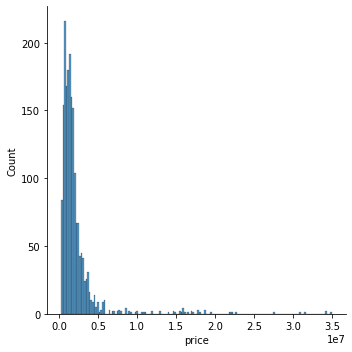

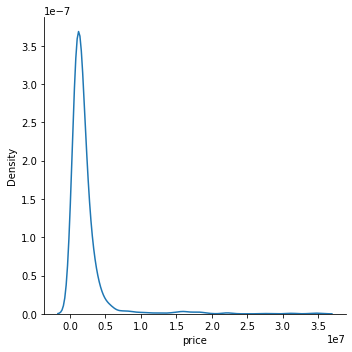

In [62]:
# See how prices are distributed
sns.displot(df,x="price")
sns.displot(df,x="price",kind="kde")

In [63]:
# Check for missing values or duplicated data
print(df.isna().sum())
print(df.duplicated().sum())

id                     0
neighborhood           0
latitude               0
longitude              0
price                  0
size_in_sqft           0
price_per_sqft         0
no_of_bedrooms         0
no_of_bathrooms        0
quality                0
maid_room              0
unfurnished            0
balcony                0
barbecue_area          0
built_in_wardrobes     0
central_ac             0
childrens_play_area    0
childrens_pool         0
concierge              0
covered_parking        0
kitchen_appliances     0
lobby_in_building      0
maid_service           0
networked              0
pets_allowed           0
private_garden         0
private_gym            0
private_jacuzzi        0
private_pool           0
security               0
shared_gym             0
shared_pool            0
shared_spa             0
study                  0
vastu_compliant        0
view_of_landmark       0
view_of_water          0
walk_in_closet         0
dtype: int64
0


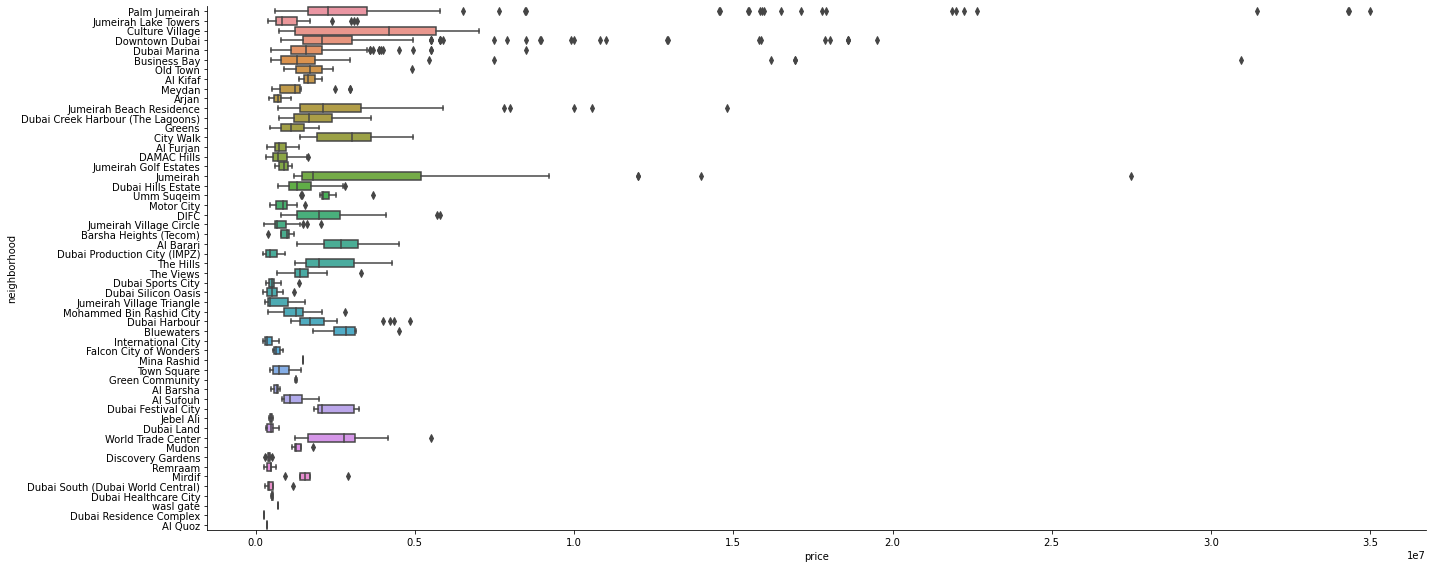

In [64]:
# Relationship between price and neighborhood
sns.catplot( x="price", y="neighborhood", data=df, kind="box", height=8, aspect=2.5)
plt.show()

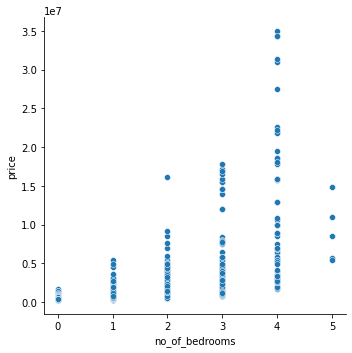

In [65]:
# Relationship between price and number of bedrooms
sns.relplot(x="no_of_bedrooms", y="price", data=df)

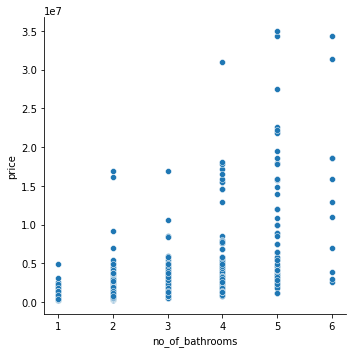

In [66]:
# Relationship between price and number of bathrooms
sns.relplot(x="no_of_bathrooms", y="price", data=df)

#### Tentativa de realizar uma comparação do quality em relação aos bools

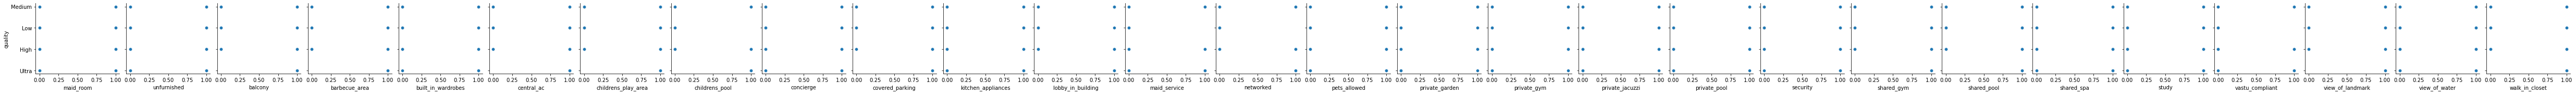

In [106]:



# col_types = df.dtypes
# # Crie uma lista vazia para armazenar os nomes das colunas booleanas
# bool_cols = []

# # Iterar sobre os tipos de dados das colunas
# for col, col_type in col_types.items():
#   # Se o tipo de dado for bool, adicione o nome da coluna à lista
#   if col_type == 'bool':
#     bool_cols.append(col)

# # Exiba a lista de colunas booleanas
# #print(bool_cols)

# #plt.scatter('quality',)
# #sns.pairplot(df, x_vars=bool_cols, y_vars=['quality'])

# result_list = []
# print(len(bool_cols))
# for col in bool_cols:
#   # Agrupe os dados pelo atributo atual e conte quantos valores "True" existem para cada outro atributo
#   counts = df.groupby('quality')[df.columns.difference([col])].sum()
  
#   # Adicione os resultados à lista
#   result_list.append(counts)

# print(result_list)  

# Data Preparation

In [68]:
# Rename columns
df.rename(columns={"study":"study_area"}, inplace=True)

# Drop columns
df.drop(['id','latitude', 'longitude','quality','vastu_compliant'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905 entries, 0 to 1904
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighborhood         1905 non-null   object 
 1   price                1905 non-null   int64  
 2   size_in_sqft         1905 non-null   int64  
 3   price_per_sqft       1905 non-null   float64
 4   no_of_bedrooms       1905 non-null   int64  
 5   no_of_bathrooms      1905 non-null   int64  
 6   maid_room            1905 non-null   bool   
 7   unfurnished          1905 non-null   bool   
 8   balcony              1905 non-null   bool   
 9   barbecue_area        1905 non-null   bool   
 10  built_in_wardrobes   1905 non-null   bool   
 11  central_ac           1905 non-null   bool   
 12  childrens_play_area  1905 non-null   bool   
 13  childrens_pool       1905 non-null   bool   
 14  concierge            1905 non-null   bool   
 15  covered_parking      1905 non-null   b

In [69]:
# Transform Bool columns to Int
df = df.astype({'maid_room':int,'unfurnished':int,'balcony':int,'barbecue_area':int,
'built_in_wardrobes':int,'central_ac':int,'childrens_play_area':int,'childrens_pool':int,
'concierge':int,'covered_parking':int,'kitchen_appliances':int,'lobby_in_building':int,
'maid_service':int,'networked':int,'pets_allowed':int,'private_garden':int,'private_gym':int,
'private_jacuzzi':int,'private_pool':int,'security':int,'shared_gym':int,'shared_pool':int,
'shared_spa':int,'study_area':int,'view_of_landmark':int,'view_of_water':int,'walk_in_closet':int})
df.head()

,neighborhood,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,unfurnished,balcony,barbecue_area,...,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study_area,view_of_landmark,view_of_water,walk_in_closet
0,Palm Jumeirah,2700000,1079,2502.32,1,2,0,0,1,1,...,0,0,0,1,0,0,0,0,1,0
1,Palm Jumeirah,2850000,1582,1801.52,2,2,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
2,Jumeirah Lake Towers,1150000,1951,589.44,3,5,1,1,1,0,...,1,0,1,1,1,0,0,1,1,1
3,Culture Village,2850000,2020,1410.89,2,3,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Palm Jumeirah,1729200,507,3410.65,0,1,0,0,0,0,...,0,0,1,1,1,1,0,1,1,0


In [70]:
# Label Enconding in Neighborhood
label_encoder = preprocessing.LabelEncoder()
df['neighborhood']= label_encoder.fit_transform(df['neighborhood'])

In [71]:
df['neighborhood'].unique()

array([46, 36, 11, 15, 22,  9, 45,  3, 39,  6, 34, 16, 30, 10,  2, 12, 35,
       33, 20, 51, 43, 13, 37,  7,  0, 23, 48, 49, 27, 25, 38, 42, 18,  8,
       31, 28, 40, 50, 29,  1,  5, 17, 32, 21, 52, 44, 14, 47, 41, 26, 19,
       53, 24,  4])

In [72]:
#Normalize Neighboorhood values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
df[['neighborhood']] = min_max_scaler.fit_transform(df[['neighborhood']])
df['neighborhood'].describe()

count    1905.000000
mean        0.511841
std         0.249825
min         0.000000
25%         0.283019
50%         0.415094
75%         0.698113
max         1.000000
Name: neighborhood, dtype: float64

In [73]:
#Normalize Size In Sqft values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
df[['size_in_sqft']] = min_max_scaler.fit_transform(df[['size_in_sqft']])
df['size_in_sqft'].describe()

count    1905.000000
mean        0.120992
std         0.096045
min         0.000000
25%         0.058824
50%         0.105257
75%         0.151799
max         1.000000
Name: size_in_sqft, dtype: float64

In [74]:
#Normalize Price Per Sqft values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
df[['price_per_sqft']] = min_max_scaler.fit_transform(df[['price_per_sqft']])
df['price_per_sqft'].describe()

count    1905.000000
mean        0.217231
std         0.150422
min         0.000000
25%         0.114548
50%         0.181755
75%         0.283670
max         1.000000
Name: price_per_sqft, dtype: float64

In [75]:
#Normalize Nr of Bedrooms values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
df[['no_of_bedrooms']] = min_max_scaler.fit_transform(df[['no_of_bedrooms']])
df['no_of_bedrooms'].describe()

count    1905.000000
mean        0.358635
std         0.189898
min         0.000000
25%         0.200000
50%         0.400000
75%         0.400000
max         1.000000
Name: no_of_bedrooms, dtype: float64

In [76]:
#Normalize Nr of Bathrooms values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
df[['no_of_bathrooms']] = min_max_scaler.fit_transform(df[['no_of_bathrooms']])
df['no_of_bathrooms'].describe()

count    1905.000000
mean        0.302572
std         0.212623
min         0.000000
25%         0.200000
50%         0.200000
75%         0.400000
max         1.000000
Name: no_of_bathrooms, dtype: float64

In [77]:
# Calculate IQR (Inter Quartile Range)
Q1 = np.percentile(df['price'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['price'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Dimensions: ", df.shape)

# Define upper bound
upper = np.where(df['price'] >= (Q3+1.5*IQR))
# Define lower bound
lower = np.where(df['price'] <= (Q1-1.5*IQR))

#Remove outliers
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)

print("New Dimensions: ", df.shape)

Old Dimensions:  (1905, 33)
New Dimensions:  (1777, 33)


# Train/test data split

In [78]:
x = df.drop(['price'],axis=1)
y = df['price'].to_frame()

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=RANDOM_SEED)

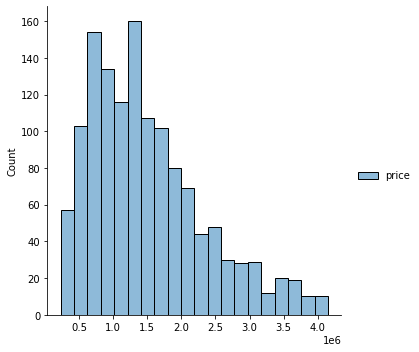

In [80]:
sns.displot(y_train)

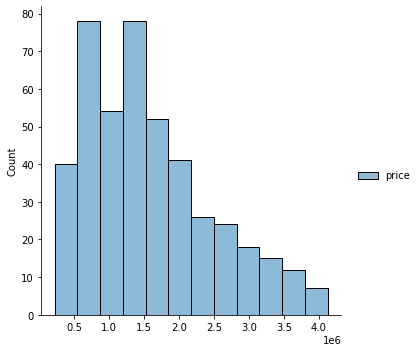

In [81]:
sns.displot(y_test)

# Linear Regression

In [82]:
lm = LinearRegression()
lm.fit(x_train,y_train)
predictions = lm.predict(x_test)

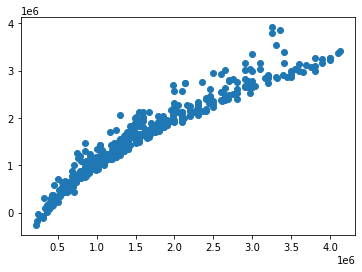

In [83]:
plt.scatter(y_test, predictions)

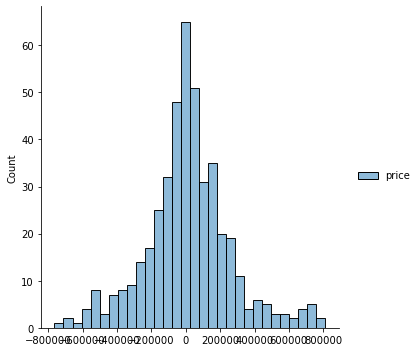

In [84]:
sns.displot((y_test-predictions), bins=30)

In [85]:
# Model Evaluation
coeff_df = pd.DataFrame(lm.coef_[0], x.columns, columns=['Coefficient'])
print(coeff_df)

                      Coefficient
neighborhood        -5.673204e+04
size_in_sqft         9.004202e+06
price_per_sqft       5.052143e+06
no_of_bedrooms       3.694212e+05
no_of_bathrooms      1.506585e+05
maid_room           -3.792943e+04
unfurnished         -1.319335e+02
balcony             -2.294007e+04
barbecue_area       -3.807958e+03
built_in_wardrobes  -2.711183e+03
central_ac           4.103677e+02
childrens_play_area  3.026293e+04
childrens_pool      -3.817837e+04
concierge            1.579396e+04
covered_parking     -4.087849e+04
kitchen_appliances   4.734259e+03
lobby_in_building    3.947901e+04
maid_service         3.965614e+04
networked           -2.898401e+04
pets_allowed         6.083360e+03
private_garden      -1.179668e+05
private_gym          7.928283e+04
private_jacuzzi      6.050465e+03
private_pool         2.326860e+04
security             2.283803e+03
shared_gym           3.666917e+03
shared_pool          1.243435e+04
shared_spa          -4.220893e+04
study_area    

In [86]:
#MAE
metrics.mean_absolute_error(y_test,predictions)

178196.87063045913

In [87]:
#MSE
metrics.mean_squared_error(y_test, predictions)

62111505389.029335

In [88]:
#RMSE
np.sqrt(metrics.mean_squared_error(y_test, predictions))

249221.79958629087

# Decision Trees (Regression)

In [89]:
dtr = DecisionTreeRegressor(random_state=RANDOM_SEED)
dtr.fit(x_train, np.ravel(y_train))

DecisionTreeRegressor(random_state=2021)

In [90]:
predictions = dtr.predict(x_test)
predictions

array([2400000., 1800000., 1595000., 1200000., 1425000.,  661300.,
       1445888., 3400000., 1950000., 1050000.,  795000., 3499900.,
       1550000.,  680000., 2448000., 1991888.,  443850.,  600000.,
        675000., 1250000., 1750000.,  610000., 2448000., 2250000.,
        900000., 1425000., 1971905., 1025000., 4000000., 1926888.,
       1398000., 2700000.,  630503.,  410000., 2700000., 3600000.,
        349000., 2949900.,  443850.,  679000., 1250000., 2094999.,
       3499000., 1000000., 1100000., 1150000., 1350000., 1750000.,
        330000., 1200000.,  808255.,  670728., 2789900., 1400000.,
       3200000.,  610577., 2400000.,  400000., 1650000.,  615000.,
       1780888., 1700000.,  350000., 1150000., 1300000., 4000000.,
       1750000., 3380000.,  920000., 2140000., 2974999., 1688000.,
       2270000., 3600000., 2700000., 3175000.,  860000., 1800000.,
       2750000., 3600000., 1540000., 2700000.,  619500.,  900000.,
       1380888., 1785000.,  605000., 2200000., 1599990., 29500

In [91]:
#DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
#                      max_features=None, max_leaf_nodes=None,
#                      min_impurity_decrease=0.0, min_impurity_split=None,
#                      min_samples_leaf=1, min_samples_split=2,
#                      min_weight_fraction_leaf=0.0, presort='deprecated',
#                      random_state=1, splitter='best')

In [92]:
#MAE
metrics.mean_absolute_error(y_test,predictions)

77177.19101123596

In [93]:
#MSE
metrics.mean_squared_error(y_test, predictions, squared=True)

18694102228.368538

In [94]:
#RMSE
metrics.mean_squared_error(y_test, predictions, squared=False)

136726.37722242382

In [95]:
#Cross Validation
scores = cross_val_score(dtr,x,y,cv=10)
print(scores)
print("RESULT: %0.2f accuracy with standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.97272289 0.98174186 0.98302601 0.98404032 0.98741024 0.95064781
 0.94547039 0.97877367 0.98653802 0.98937032]
RESULT: 0.98 accuracy with standard deviation of 0.01


# MultiLayer Perceptron (MLP)

In [96]:
#Scale the features between [0-1]
scaler_x = MinMaxScaler(feature_range=(0,1)).fit(x)
scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y)
x_scaled = pd.DataFrame(scaler_x.transform(x[x.columns]), columns=x.columns)
y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]), columns=y.columns)

In [97]:
x.head()

,neighborhood,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,...,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study_area,view_of_landmark,view_of_water,walk_in_closet
0,0.867925,0.084572,0.481649,0.2,0.2,0,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0.867925,0.138763,0.323954,0.4,0.2,0,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
2,0.679245,0.178518,0.051208,0.6,0.8,1,1,1,0,1,...,1,0,1,1,1,0,0,1,1,1
3,0.207547,0.185951,0.236053,0.4,0.4,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.867925,0.022948,0.686044,0.0,0.0,0,0,0,0,1,...,0,0,1,1,1,1,0,1,1,0


In [98]:
x_scaled.head()

,neighborhood,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,maid_room,unfurnished,balcony,barbecue_area,built_in_wardrobes,...,private_jacuzzi,private_pool,security,shared_gym,shared_pool,shared_spa,study_area,view_of_landmark,view_of_water,walk_in_closet
0,0.867925,0.143694,0.573995,0.25,0.2,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.867925,0.235768,0.386065,0.50,0.2,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.679245,0.303313,0.061026,0.75,0.8,1.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
3,0.207547,0.315944,0.281311,0.50,0.4,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.867925,0.038990,0.817578,0.00,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0


In [99]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.2, random_state=RANDOM_SEED)

In [100]:
#em vez do relu usar o softmax - sugestao da prof
#modelo MLP com 7 camadas
def build_model(activation='relu', learning_rate=0.01):
    model=Sequential()
    model.add(Dense(64,input_dim=33,activation=activation))
    model.add(Dense(32,activation=activation))
    model.add(Dense(16,activation=activation))
    model.add(Dense(8,activation=activation))
    model.add(Dense(4,activation=activation))
    model.add(Dense(2,activation=activation))
    model.add(Dense(1,activation='relu'))

    model.compile(
        loss='mae',
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['mae','mse'])
    return model


In [101]:
model = build_model()
model.summary()

Model: "sequential_134"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_938 (Dense)            (None, 64)                2176      
_________________________________________________________________
dense_939 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_940 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_941 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_942 (Dense)            (None, 4)                 36        
_________________________________________________________________
dense_943 (Dense)            (None, 2)                 10        
_________________________________________________________________
dense_944 (Dense)            (None, 1)              

In [102]:
#encontrar o melhor MLP possivel
TURNING_DICT = {
    'activation': ['relu','sigmoid'],
    'learning_rate':[0.01,0.001]
}

In [103]:
kf = KFold(n_splits=33, shuffle=True, random_state=RANDOM_SEED)

model = KerasRegressor(build_fn=build_model, epochs=20, batch_size=100)
grid_search = GridSearchCV(estimator=model, param_grid=TURNING_DICT, cv=kf, scoring='neg_mean_absolute_error', refit='True', verbose=1)
grid_search.fit(x_train, y_train, validation_split=0.2) #corre mas dá erro aqui

Fitting 33 folds for each of 4 candidates, totalling 132 fits
Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20
Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20
Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20
Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/wrappers/scikit_learn.py", line 162, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py", line 1184, in fit
    tmp_logs = self.train_function(iterator)
  File "/home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/eager/def_function.py", line 885, in __call__

Epoch 1/20


ValueError: in user code:

    /home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/pedroaraujo/anaconda3/envs/mypython3version/lib/python3.6/site-packages/keras/engine/input_spec.py:254 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_267 is incompatible with the layer: expected axis -1 of input shape to have value 33 but received input with shape (None, 32)


In [ ]:
print("Best: %f using %s" % (grid_search.best_score_,grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['stds']
params = grid_search.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" % (mean,stdev,param))

In [ ]:
#para ver se o nosso modelo está overfitted